<a href="https://colab.research.google.com/github/NFalah25/PCVK/blob/main/Week%2011/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nama : Naufal Falah Wafiuddin
#Kelas : TI - 3A
#Absen : 23
#NIM : 2141720129

# **Object Detection**
Metode yang digunakan :
1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

In [ ]:
# import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.2

# **Template Matching**

Menggunakan library openCV
**cv.matchTemplate()**, dengan parameter
- **image**: citra input
- **templ**: template yang dicari, ukurannya tidak boleh lebih besar dari citra input
- **method**: metode dari template matching

jenis metode template matching di OpenCV:
1. TM_SQDIFF
2. TM_SQDIFF_NORMED
3. TM_CCORR
4. TM_CCORR_NORMED
5. TM_CCOEFF
6. TM_CCOEFF_NORMED


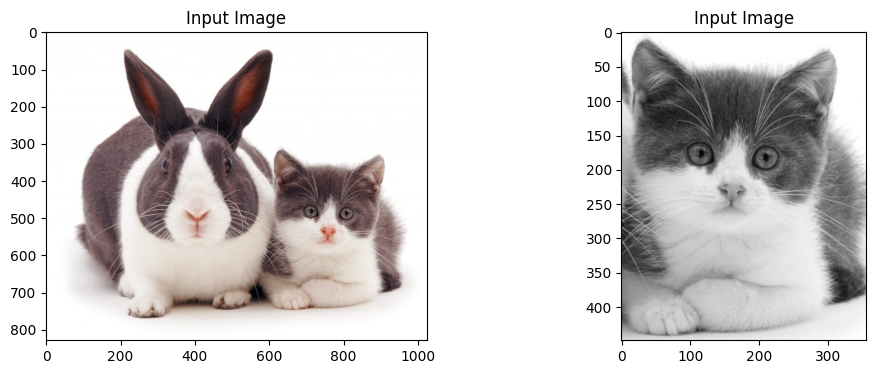

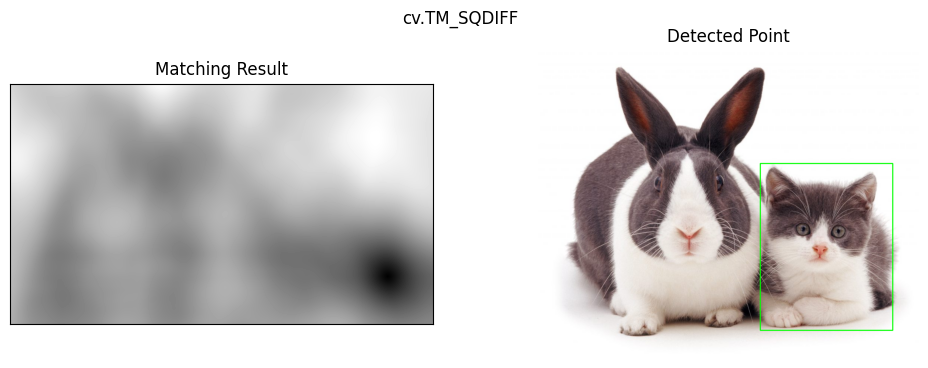

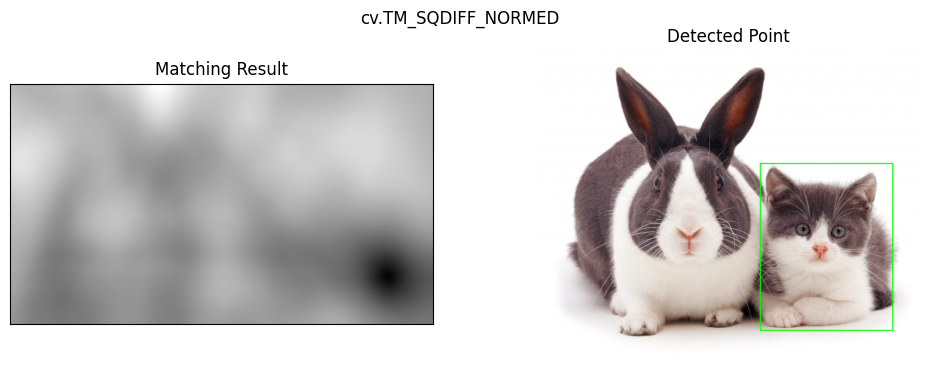

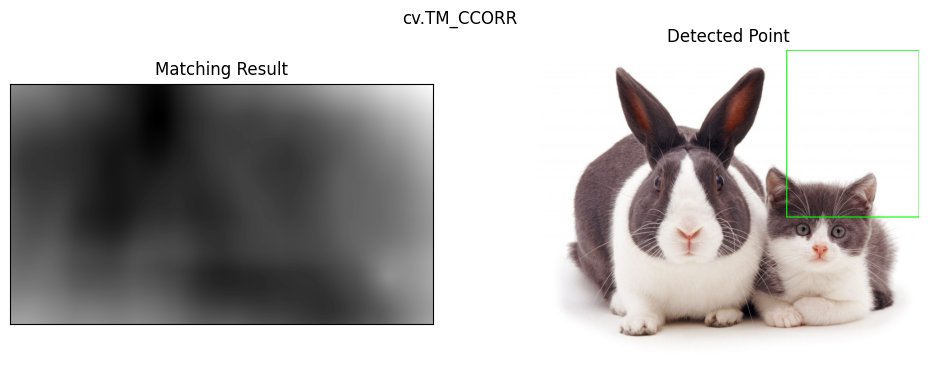

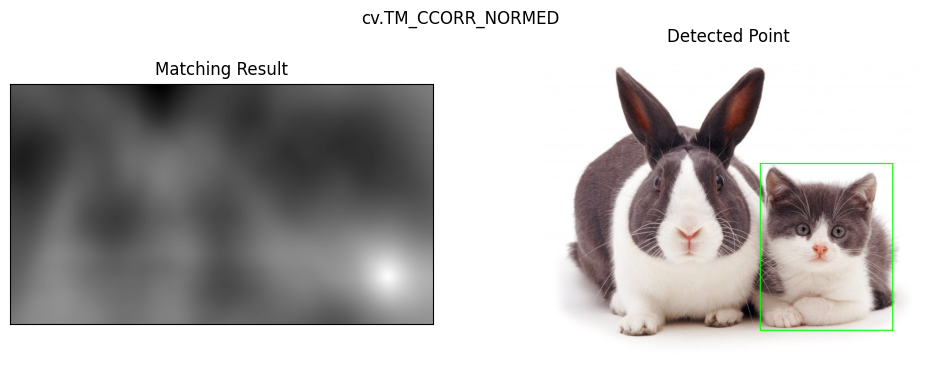

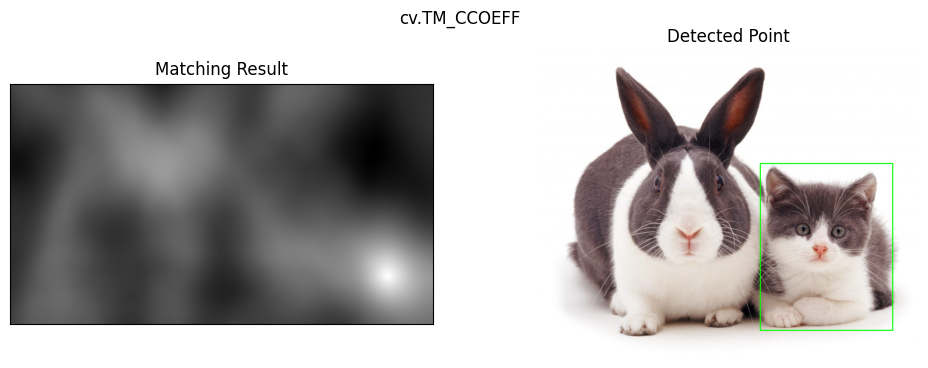

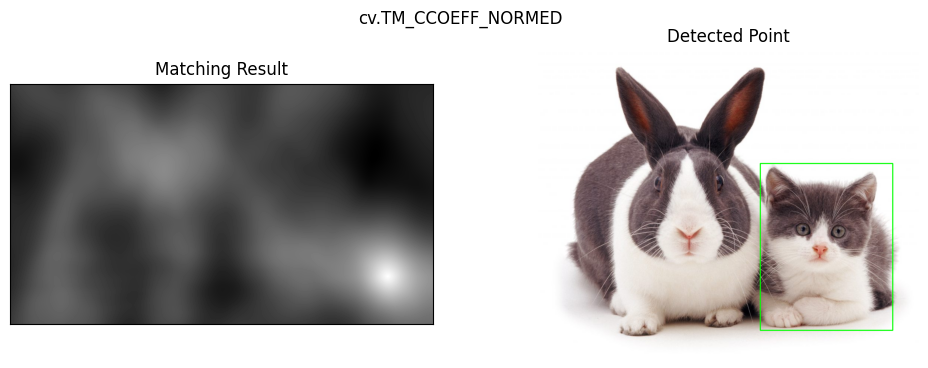

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image and the template
input_image = cv2.imread('/content/drive/MyDrive/PCVK/pertemuan 11/cats_and_bunnies.jpg')
template = cv2.imread('/content/drive/MyDrive/PCVK/pertemuan 11/cat2_templatejpg.jpg')

# Convert the input image and template to grayscale
input_gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Define the list of methods to be used
methods = [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED, cv2.TM_CCORR, cv2.TM_CCORR_NORMED, cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED]

method_names = [
    "cv.TM_SQDIFF", "cv.TM_SQDIFF_NORMED", "cv.TM_CCORR", "cv.TM_CCORR_NORMED", "cv.TM_CCOEFF", "cv.TM_CCOEFF_NORMED"
]

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title('Input Image')


plt.subplot(122)
plt.imshow(template_gray, cmap='gray')
plt.title('Input Image')

# Perform template matching for each method
for i, method in enumerate(methods):
    result = cv2.matchTemplate(input_gray, template_gray, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        match_loc = min_loc
    else:
        match_loc = max_loc

    # Draw a rectangle around the detected region on a copy of the input image
    detected_image = input_image.copy()
    h, w = template_gray.shape
    top_left = match_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(detected_image, top_left, bottom_right, (0, 255, 0), 2)

    # Plot the matching result and detected image with colored rectangles

    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.imshow(result, cmap='gray')
    plt.title('Matching Result')
    plt.xticks([]), plt.yticks([])

    plt.subplot(122)
    plt.imshow(cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Point')
    plt.axis('off')
    plt.suptitle(method_names[i])

    plt.show()


3. Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai
berikut:

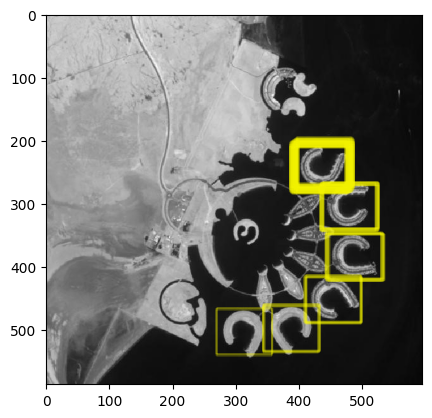

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the input image and the template
input_image = cv2.imread('/content/drive/MyDrive/PCVK/pertemuan 11/bahrain.jpg',0)
template = cv2.imread('/content/drive/MyDrive/PCVK/pertemuan 11/bahrain-template.jpg',0)

# library untuk mencocokkan beberapa gambar yang sama
from skimage.feature import match_template

# Hitung kemiripan citra dengan citra template
result = match_template(input_image, template)

# Tentukan threshold untuk menentukan hasil match
threshold = 0.45 # menentukan threshold untuk menentukan hasil matc
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(input_image, cmap=plt.cm.gray)
# ax.set_axis_off()
height, width = template.shape
for loc in zip(*locations[::-1]): # iterasi pada setiap lokasi yang ditemukan
    rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=0.1)
    ax.add_patch(rect)

plt.show()


4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga
menghasilkan luaran sebagai berikut:

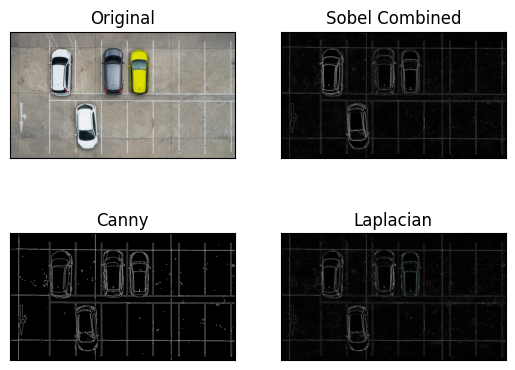

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the input image
image = cv2.imread('/content/drive/MyDrive/PCVK/pertemuan 11/car-park.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Sobel edge detection
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Apply Canny edge detection
canny = cv2.Canny(image, 100, 200)

# Apply Laplacian edge detection
laplacian = cv2.Laplacian(image, cv2.CV_64F) # Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
laplacian_abs = cv2.convertScaleAbs(laplacian)  # Converting back to uint8


# Display the original image and the detected edges
plt.subplot(2, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 2), plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Combined'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 3), plt.imshow(canny, cmap='gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 4), plt.imshow(laplacian_abs, cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.show()


5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan
luaran sebagai berikut:


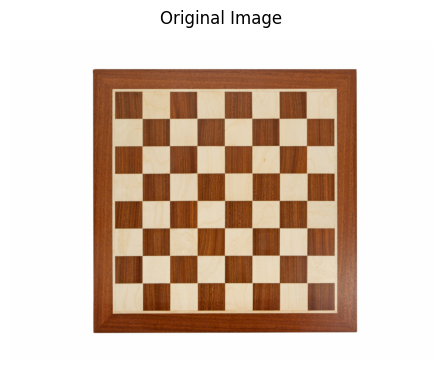

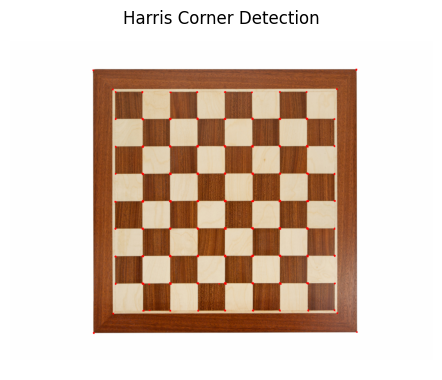

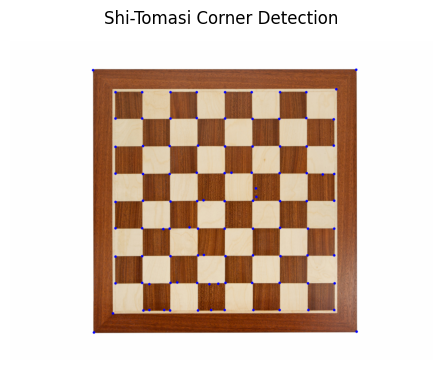

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the input image
image = cv2.imread('/content/drive/MyDrive/PCVK/pertemuan 11/chess-board.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Harris Corner Detection
harris_corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
harris_corners = cv2.dilate(harris_corners, None)

# Shi-Tomasi Corner Detection
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)

# Draw Harris corners on the image
image_harris = image.copy()
image_harris[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

# Draw Shi-Tomasi corners on the image
image_shi_tomasi = image.copy()
for corner in corners:
    x, y = corner[0]
    cv2.circle(image_shi_tomasi, (int(x), int(y)), 3, 255, -1)

# Display the original image and the images with detected corners
plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image_harris, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')

plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image_shi_tomasi, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')

plt.show()


6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori, sehingga menghasilkan luaran sebagai berikut:

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


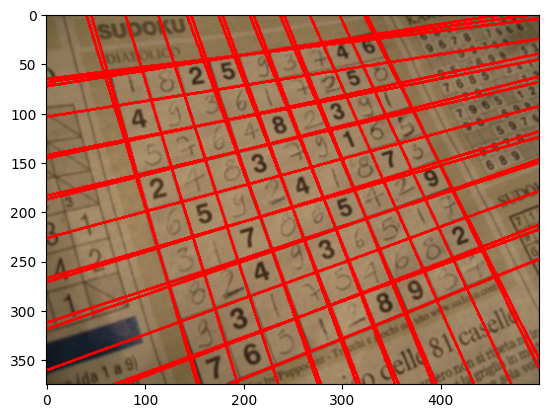

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the input image
img = cv2.imread('/content/drive/MyDrive/PCVK/pertemuan 11/sudoku.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray, 90, 150, apertureSize=3)

kernel = np.ones((3, 3), np.uint8)
edges = cv2.dilate(edges, kernel, iterations=1)

kernel = np.ones((5, 5), np.uint8)
edges = cv2.erode(edges, kernel, iterations=1)

# Apply Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 150)

if lines is None or not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    # Draw the detected lines on the input image
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Display the input image with the detected lines
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan
menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

Text(0.5, 1.0, 'Contour Detectection')

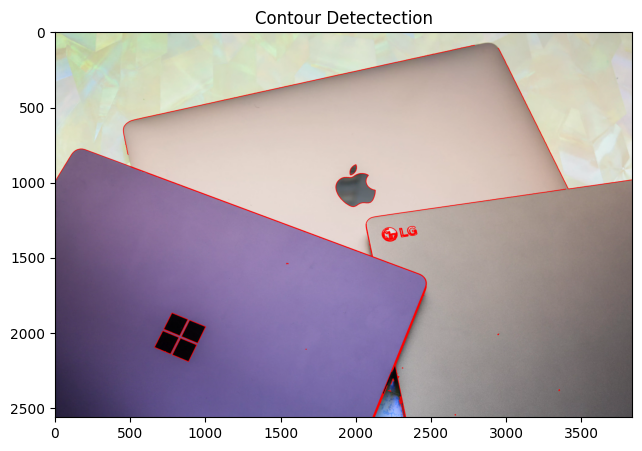

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the input image
img = cv2.imread('/content/drive/MyDrive/PCVK/pertemuan 11/laptop.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray, 50, 200, apertureSize=3)

# Find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours
cv2.drawContours(img, contours, -1, (255, 0, 0), 3)

# Display the input image with the detected contours
plt.figure(figsize=(10,5))
plt.imshow(img)
plt.title('Contour Detectection')

## Pengayaan Materi KTP

1. Import Library

In [ ]:
import cv2
import os

2. Tambahkan dataset

In [ ]:
# Lokasi hasil pelat
path_plate = '/content/drive/MyDrive/PCVK/ktp'
# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
 src = cv2.imread(os.path.join(path_plate, 'ktp3.png'))
 blurred = src.copy()
 gray = blurred.copy()

# Filtering
for i in range(10):
    blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

3. lakukan konversi ke grayscale

168.0 (300, 493)


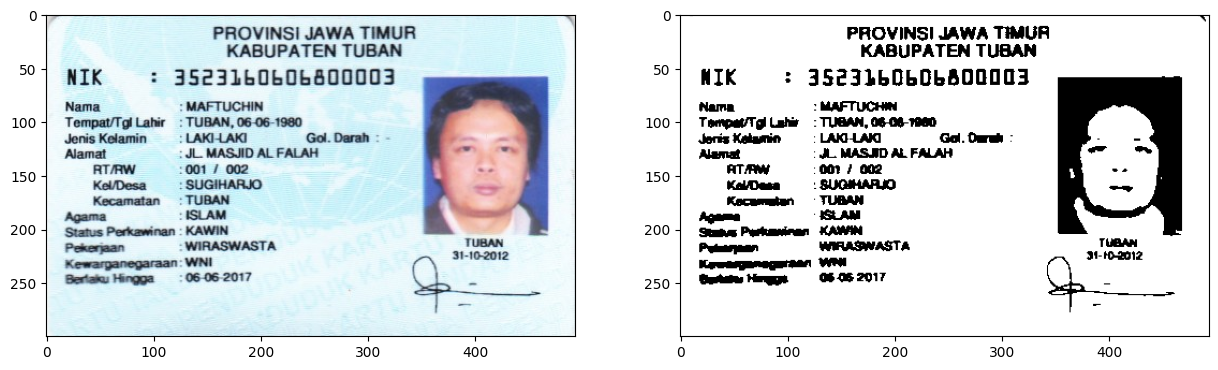

In [ ]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY
+ cv2.THRESH_OTSU)
print(ret, bw.shape)

# Tampilkan gambar asli dan hasil deteksi tepi
f, axarr = plt.subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
axarr[1].imshow(bw, cmap='gray')
plt.show()

4. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi

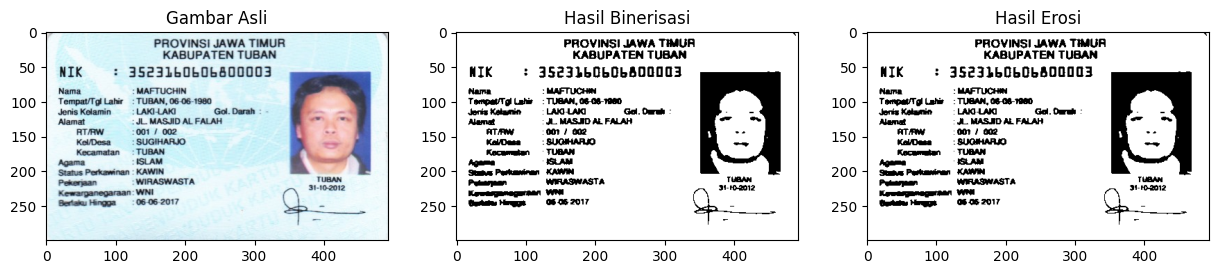

In [ ]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Terapkan operasi morfologi erosi
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Tampilkan gambar asli, hasil deteksi tepi, dan hasil erosi
f, axarr = plt.subplots(1, 3, figsize=(15, 5))
axarr[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
axarr[0].set_title("Gambar Asli")
axarr[1].imshow(bw, cmap='gray')
axarr[1].set_title("Hasil Binerisasi")
axarr[2].imshow(erode, cmap='gray')
axarr[2].set_title("Hasil Erosi")
plt.show()

5. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek.

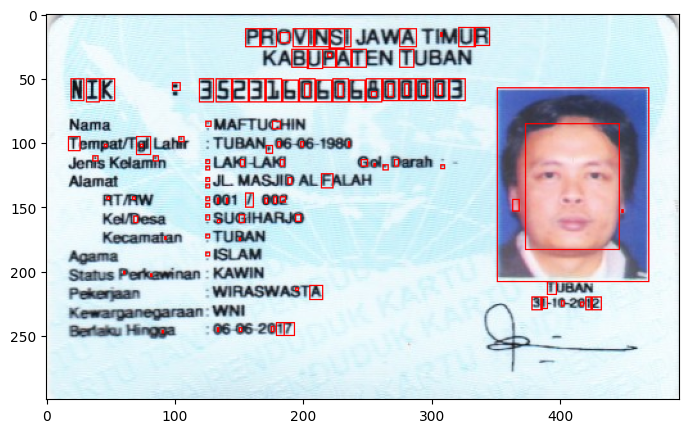

In [ ]:
# Load the input image
ktp = cv2.imread('/content/drive/MyDrive/PCVK/ktp/ktp3.png')

blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))

## Tugas


Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah.

Kelompok 3 - KTP Arief Wijaya Cimahi

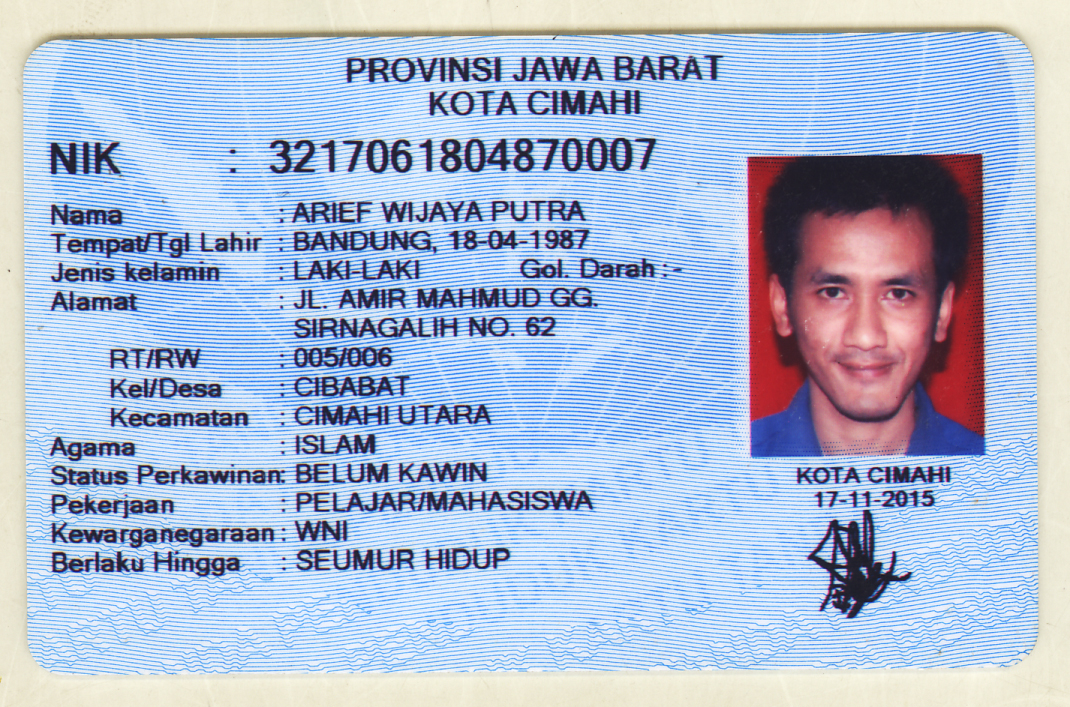

In [ ]:
# Load the input image
ktp = cv2.imread('/content/drive/MyDrive/PCVK/ktp/ktp2.png')
cv2_imshow(ktp)

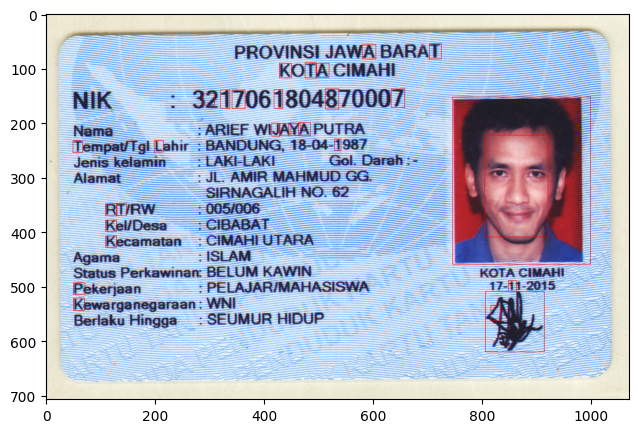

In [ ]:
blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 20 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))